In [15]:
import pandas as pd

# Load the Excel file
file_path = 'IMCRound2Data.xlsx'
xls = pd.ExcelFile(file_path)

# Read all sheets
sheets_data = {}
for sheet_name in xls.sheet_names:
    sheets_data[sheet_name] = pd.read_excel(xls, sheet_name=sheet_name)

# Display the first few rows of each sheet to understand the structure
sheets_data_preview = {sheet_name: data.head() for sheet_name, data in sheets_data.items()}
sheets_data_preview

{'prices_round_2_day_-1':    timestamp  ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF  \
 0          0  1200.00             1.5           10.5           -2.0   
 1        100  1201.75             1.5            9.5           -2.0   
 2        200  1201.75             1.5            9.5           -2.0   
 3        300  1201.75             1.5            9.5           -2.0   
 4        400  1201.75             1.5            9.5           -2.0   
 
     SUNLIGHT  HUMIDITY  DAY  
 0  2500.0000  79.00000   -1  
 1  2499.4197  79.00410   -1  
 2  2498.8457  79.00821   -1  
 3  2498.2780  79.01234   -1  
 4  2497.7166  79.01649   -1  ,
 'prices_round_2_day_0':    timestamp  ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF  \
 0          0  1111.75             1.5           10.5           -2.0   
 1        100  1111.75             1.5           10.5           -2.0   
 2        200  1109.75             1.5           10.5           -2.0   
 3        300  1109.25             1.5    

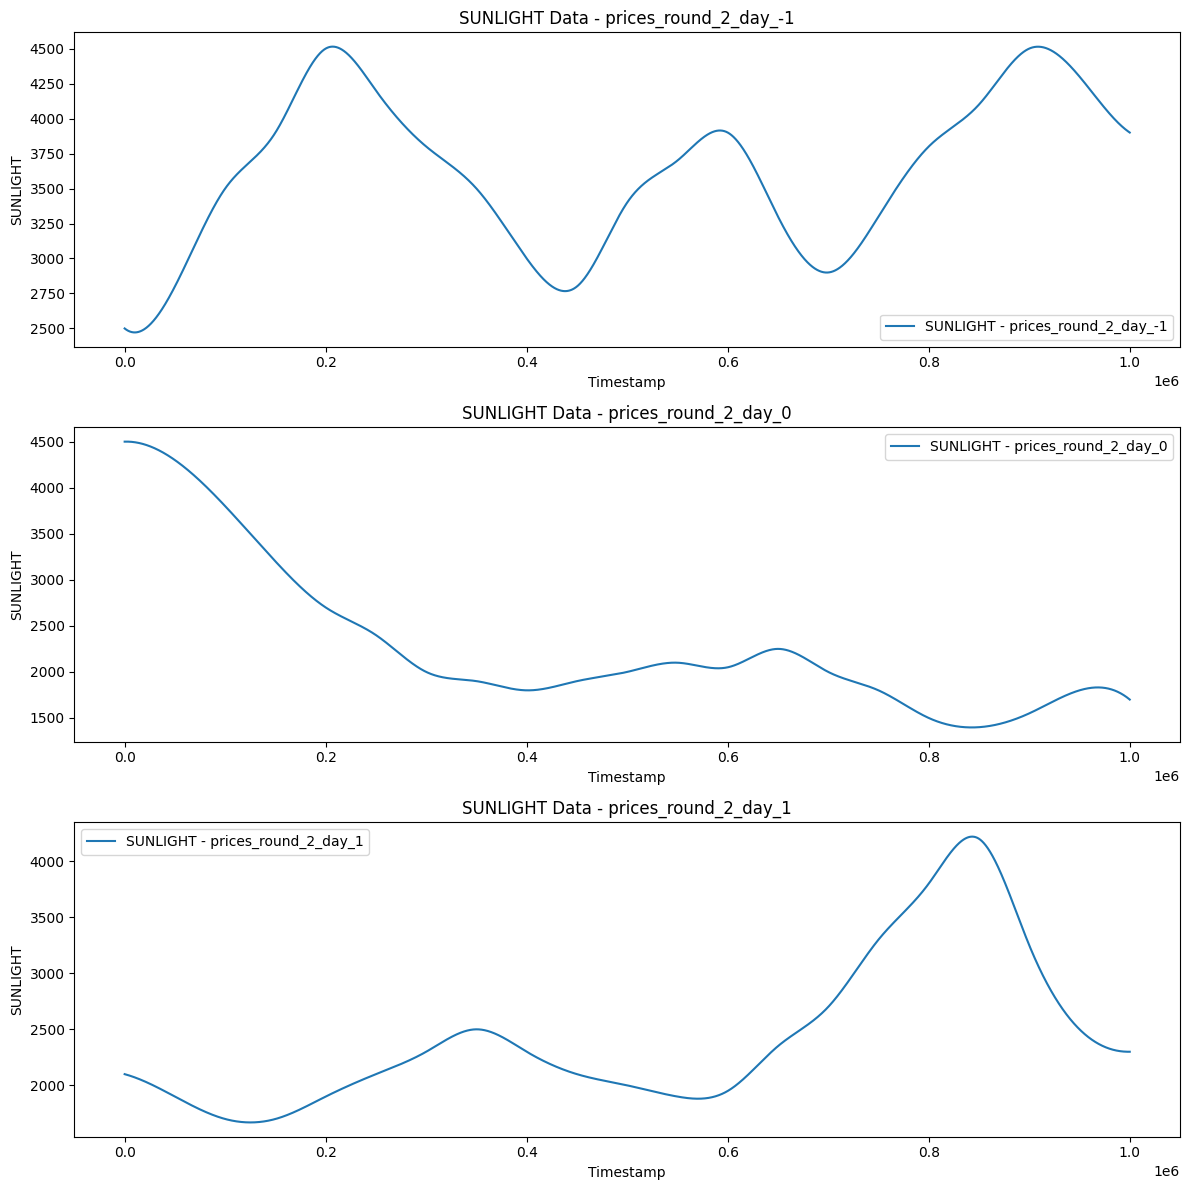

In [16]:
import matplotlib.pyplot as plt

# Plotting the SUNLIGHT data from each sheet
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

for i, (sheet_name, data) in enumerate(sheets_data.items()):
    ax[i].plot(data['timestamp'], data['SUNLIGHT'], label=f"SUNLIGHT - {sheet_name}")
    ax[i].set_title(f"SUNLIGHT Data - {sheet_name}")
    ax[i].set_xlabel("Timestamp")
    ax[i].set_ylabel("SUNLIGHT")
    ax[i].legend()

plt.tight_layout()
plt.show()


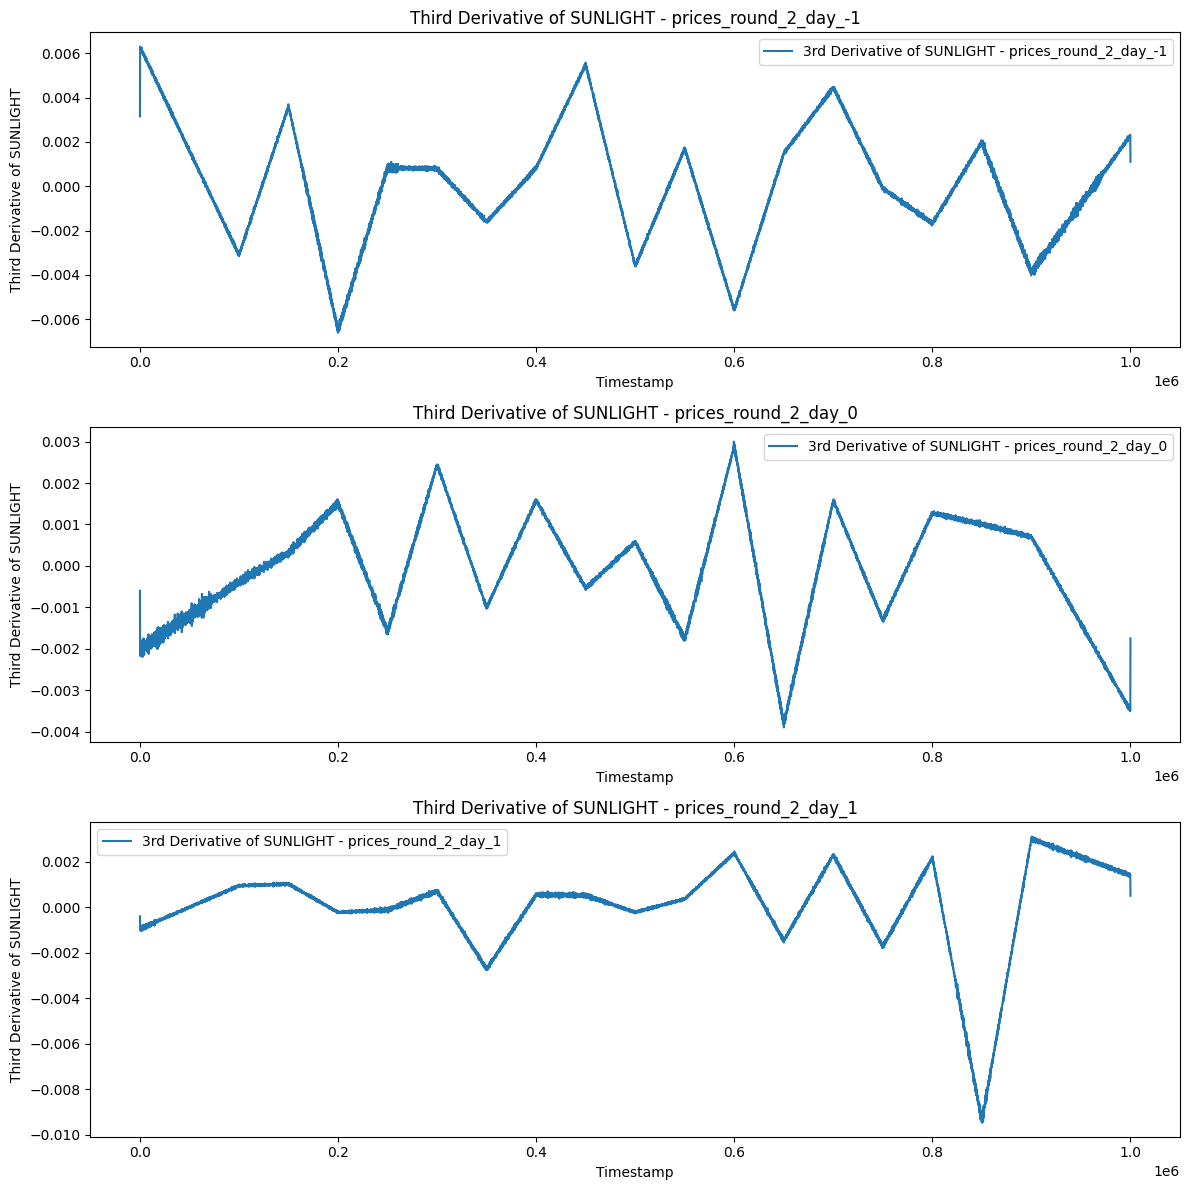

In [17]:
import numpy as np
# Improved function to calculate n-th derivative of a data series
def improved_nth_derivative(data, n=1):
    d = data.copy()
    for _ in range(n):
        # Using central differences for more accuracy in numerical differentiation
        d = np.gradient(d)
    return d

# Calculating the third derivative for SUNLIGHT in each sheet using improved method
improved_third_derivatives = {}

for sheet_name, data in sheets_data.items():
    improved_third_derivatives[sheet_name] = improved_nth_derivative(data['SUNLIGHT'].to_numpy(), n=2)

# Plotting the improved third derivatives
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

for i, (sheet_name, derivative_data) in enumerate(improved_third_derivatives.items()):
    ax[i].plot(sheets_data[sheet_name]['timestamp'], derivative_data, label=f"3rd Derivative of SUNLIGHT - {sheet_name}")
    ax[i].set_title(f"Third Derivative of SUNLIGHT - {sheet_name}")
    ax[i].set_xlabel("Timestamp")
    ax[i].set_ylabel("Third Derivative of SUNLIGHT")
    ax[i].legend()

plt.tight_layout()
plt.show()


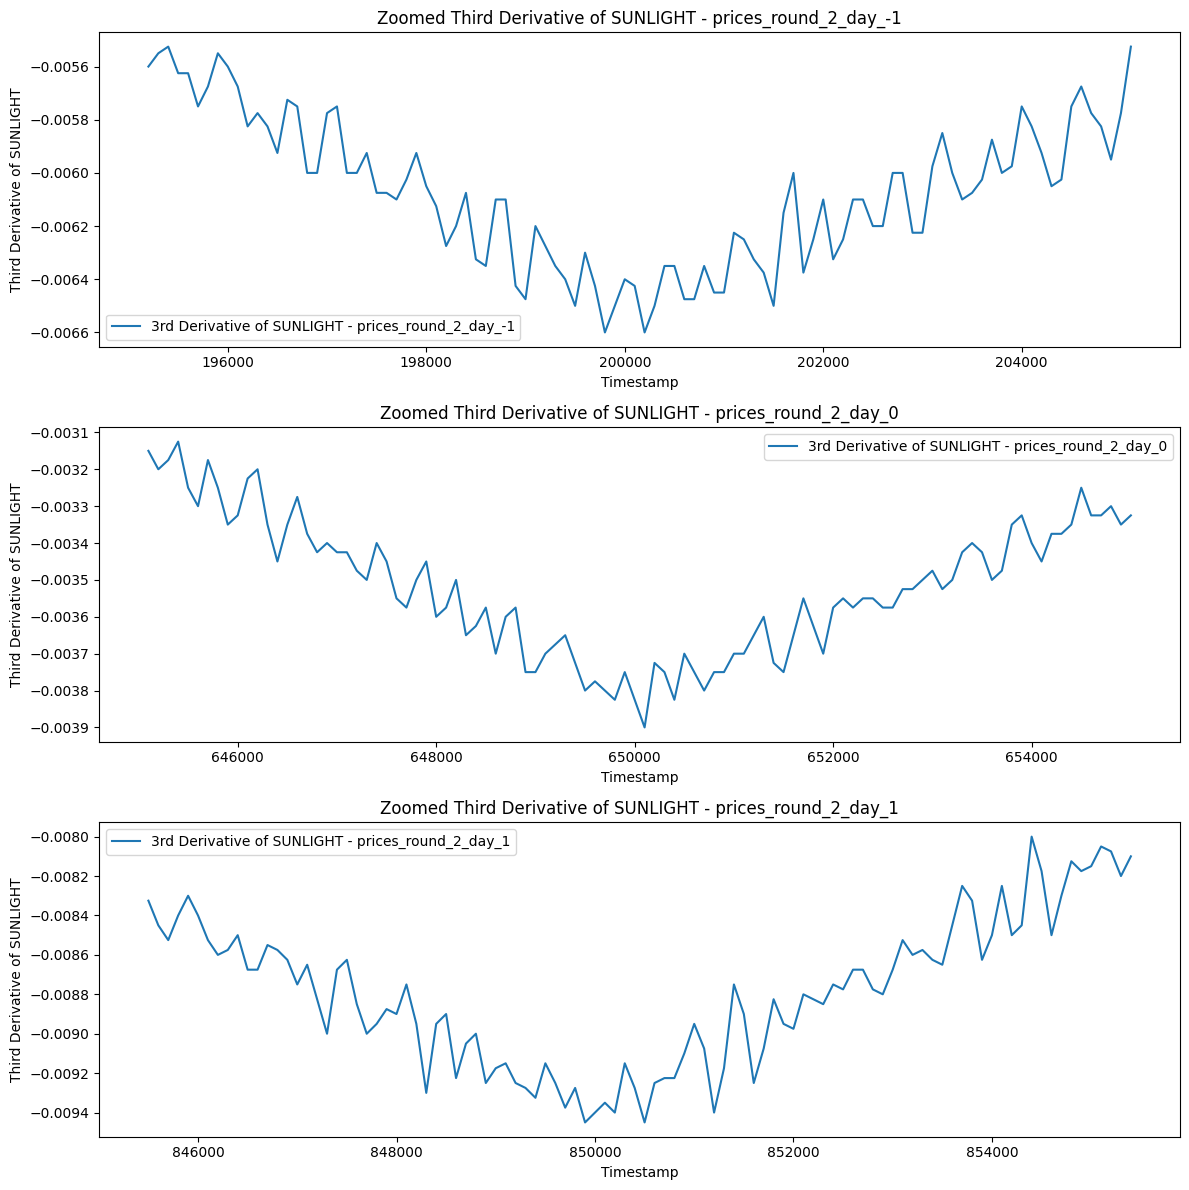

In [18]:
# Adjusting the plots to zoom in on areas with significant changes in the third derivative
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

for i, (sheet_name, derivative_data) in enumerate(improved_third_derivatives.items()):
    # Limiting x-axis to focus on where changes occur
    max_change_index = np.argmax(np.abs(derivative_data))  # Index of max change
    lower_bound = max(0, max_change_index - 50)
    upper_bound = min(len(derivative_data), max_change_index + 50)
    
    ax[i].plot(sheets_data[sheet_name]['timestamp'][lower_bound:upper_bound],
               derivative_data[lower_bound:upper_bound], label=f"3rd Derivative of SUNLIGHT - {sheet_name}")
    ax[i].set_title(f"Zoomed Third Derivative of SUNLIGHT - {sheet_name}")
    ax[i].set_xlabel("Timestamp")
    ax[i].set_ylabel("Third Derivative of SUNLIGHT")
    ax[i].legend()

plt.tight_layout()
plt.show()


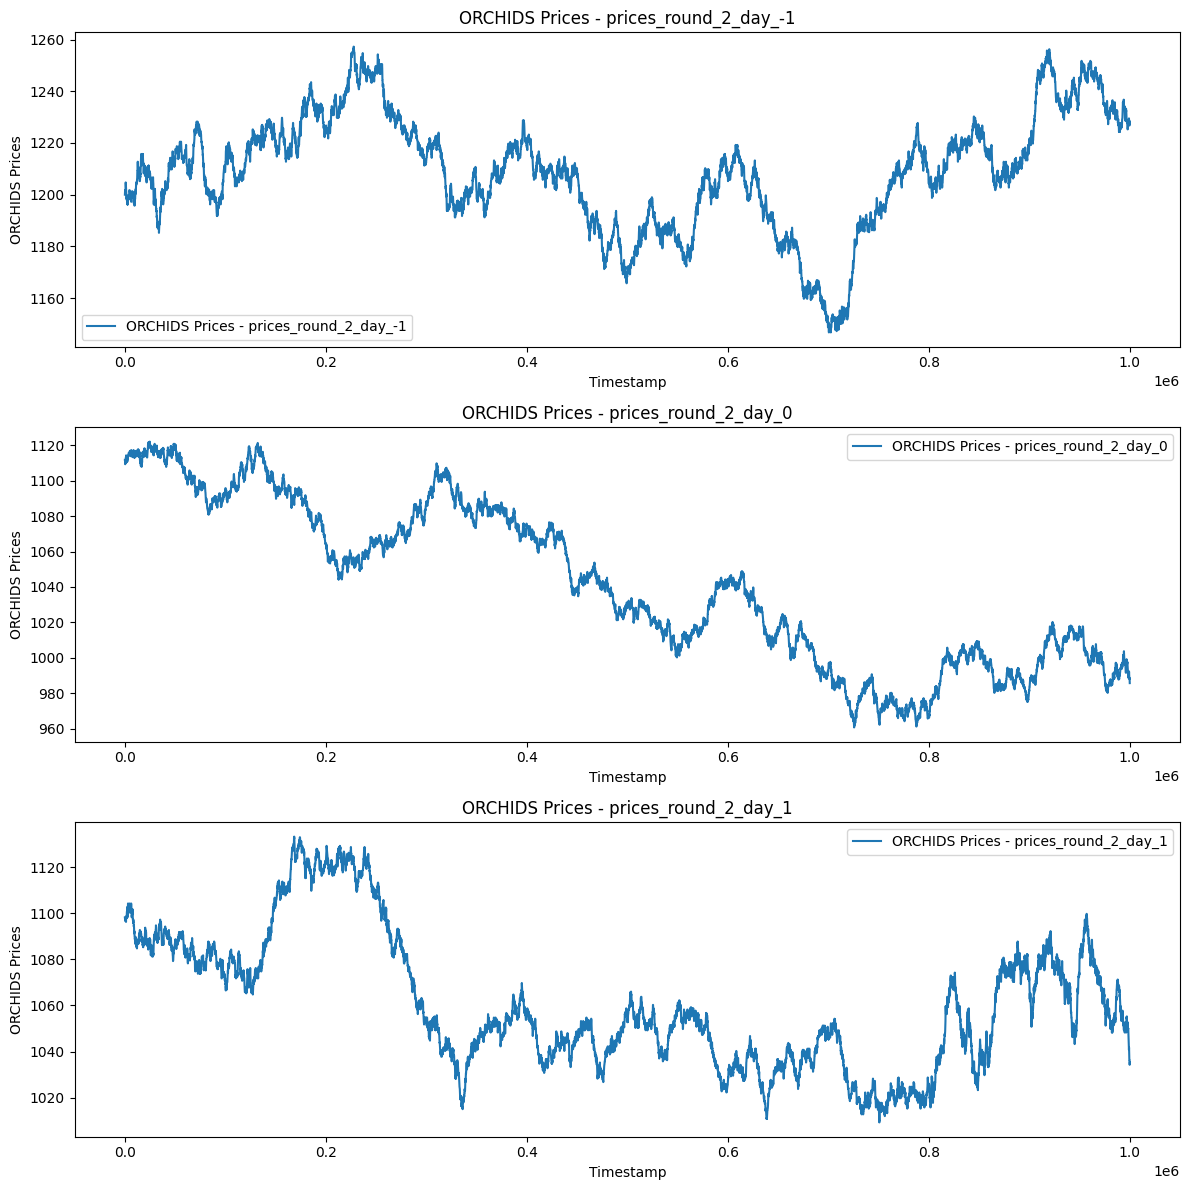

In [19]:

fig, ax = plt.subplots(3, 1, figsize=(12, 12))

for i, (sheet_name, data) in enumerate(sheets_data.items()):
    ax[i].plot(data['timestamp'], data['ORCHIDS'], label=f"ORCHIDS Prices - {sheet_name}")
    ax[i].set_title(f"ORCHIDS Prices - {sheet_name}")
    ax[i].set_xlabel("Timestamp")
    ax[i].set_ylabel("ORCHIDS Prices")
    ax[i].legend()

plt.tight_layout()
plt.show()


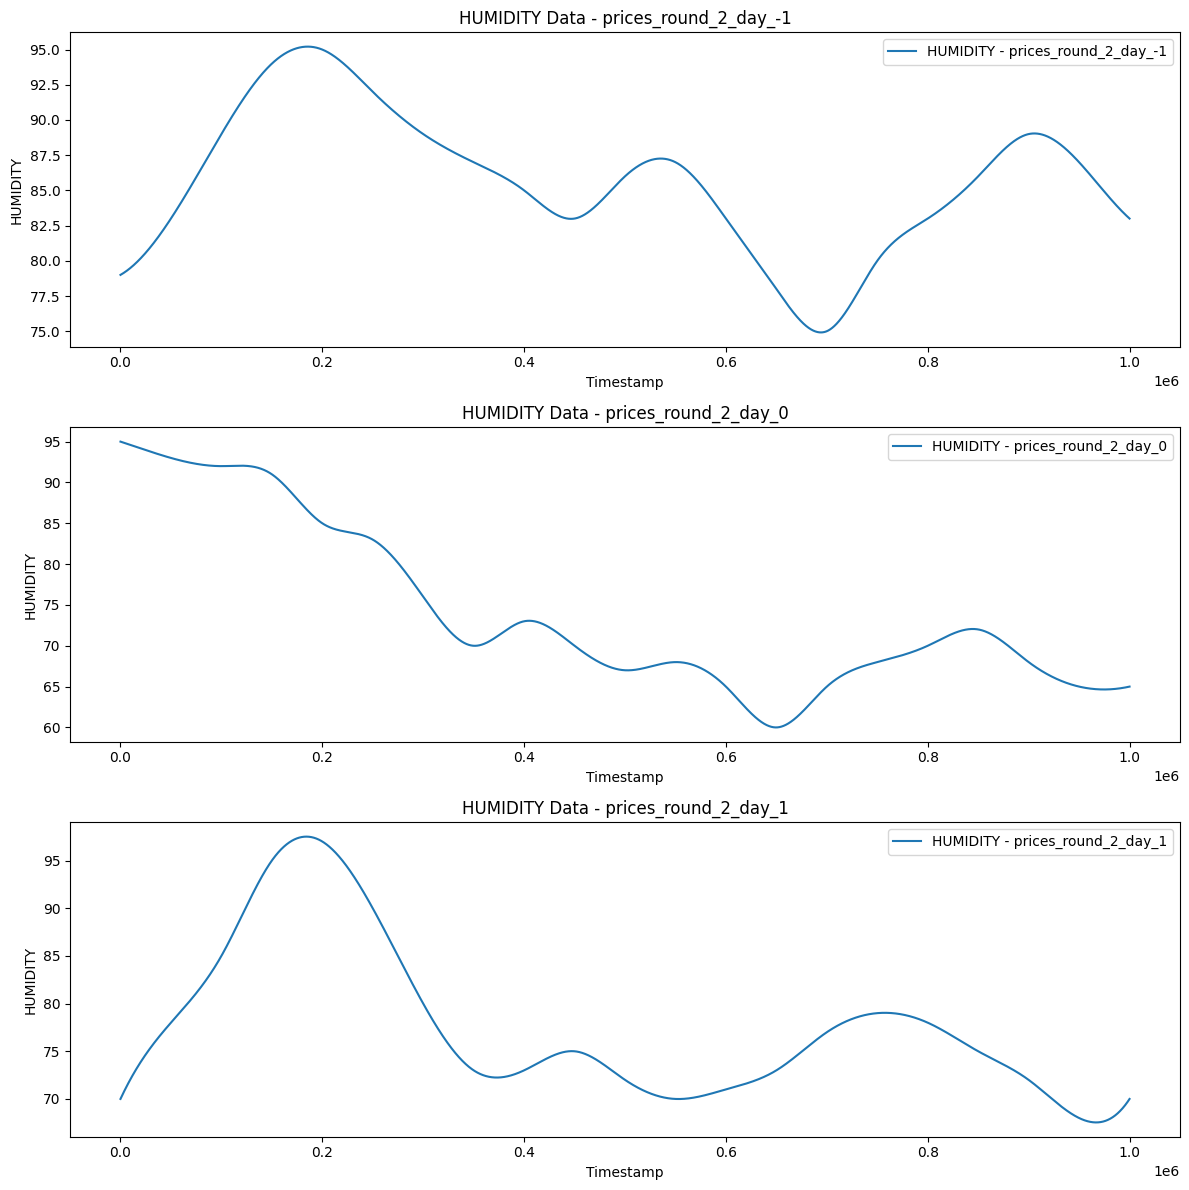

In [20]:

fig, ax = plt.subplots(3, 1, figsize=(12, 12))

for i, (sheet_name, data) in enumerate(sheets_data.items()):
    ax[i].plot(data['timestamp'], data['HUMIDITY'], label=f"HUMIDITY - {sheet_name}")
    ax[i].set_title(f"HUMIDITY Data - {sheet_name}")
    ax[i].set_xlabel("Timestamp")
    ax[i].set_ylabel("HUMIDITY")
    ax[i].legend()

plt.tight_layout()
plt.show()


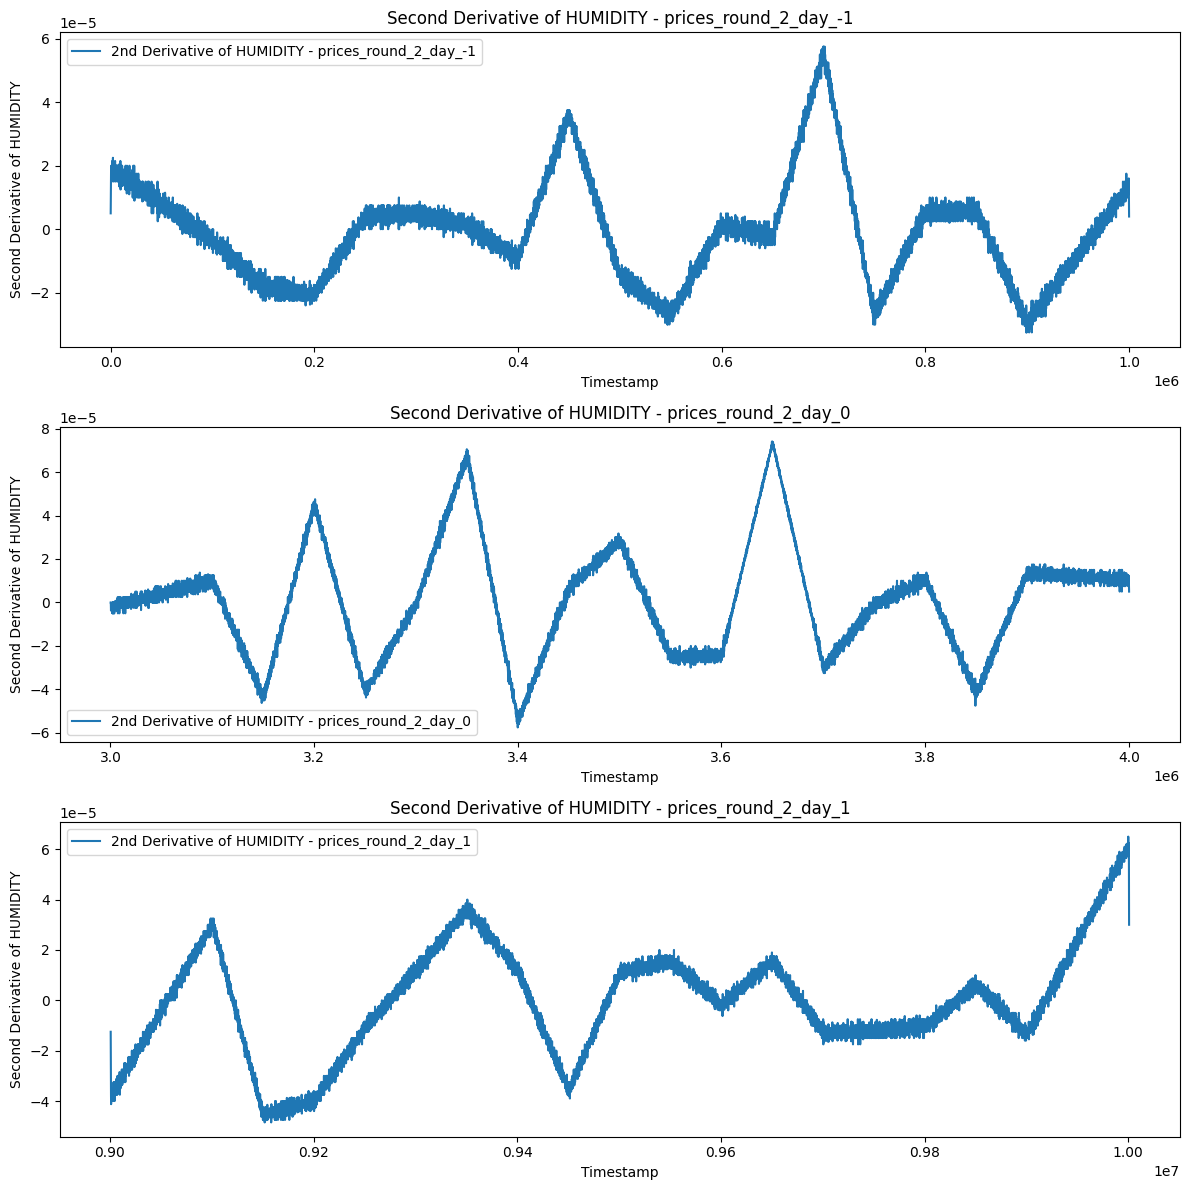

In [32]:

second_derivatives_humidity = {}

for sheet_name, data in sheets_data.items():
    second_derivatives_humidity[sheet_name] = improved_nth_derivative(data['HUMIDITY'].to_numpy(), n=2)


fig, ax = plt.subplots(3, 1, figsize=(12, 12))

for i, (sheet_name, derivative_data) in enumerate(second_derivatives_humidity.items()):
    ax[i].plot(sheets_data[sheet_name]['timestamp'], derivative_data, label=f"2nd Derivative of HUMIDITY - {sheet_name}")
    ax[i].set_title(f"Second Derivative of HUMIDITY - {sheet_name}")
    ax[i].set_xlabel("Timestamp")
    ax[i].set_ylabel("Second Derivative of HUMIDITY")
    ax[i].legend()

plt.tight_layout()
plt.show()


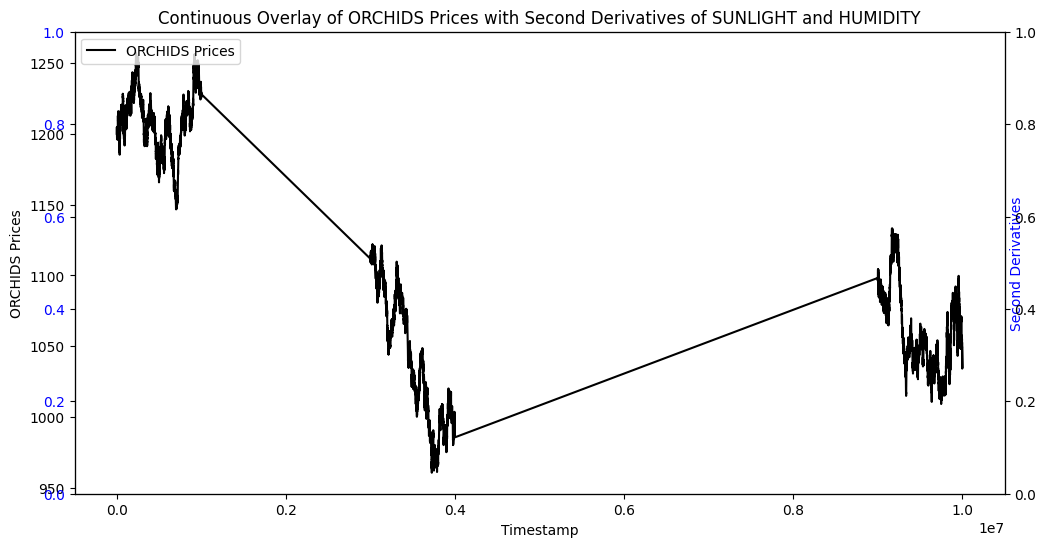

In [24]:

max_timestamp_day_minus_1 = sheets_data['prices_round_2_day_-1']['timestamp'].max()
max_timestamp_day_0 = sheets_data['prices_round_2_day_0']['timestamp'].max() + max_timestamp_day_minus_1


sheets_data['prices_round_2_day_0']['timestamp'] += max_timestamp_day_minus_1 + 100
sheets_data['prices_round_2_day_1']['timestamp'] += max_timestamp_day_0 + 100


combined_data_continuous = pd.concat([sheets_data['prices_round_2_day_-1'],
                                      sheets_data['prices_round_2_day_0'],
                                      sheets_data['prices_round_2_day_1']], ignore_index=True)


second_derivative_sunlight_continuous = improved_nth_derivative(combined_data_continuous['SUNLIGHT'].to_numpy(), n=2)
second_derivative_humidity_continuous = improved_nth_derivative(combined_data_continuous['HUMIDITY'].to_numpy(), n=2)


fig, ax1 = plt.subplots(figsize=(12, 6))


ax1.plot(combined_data_continuous['timestamp'], combined_data_continuous['ORCHIDS'], 'k-', label='ORCHIDS Prices')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('ORCHIDS Prices', color='k')
ax1.tick_params(axis='y', labelcolor='k')

ax2 = plt.twinx()
ax3 = plt.twinx()

# ax2.plot(combined_data_continuous['timestamp'], second_derivative_sunlight_continuous, 'r--', label='2nd Derivative of SUNLIGHT')
# ax3.plot(combined_data_continuous['timestamp'], second_derivative_humidity_continuous, 'b--', label='2nd Derivative of HUMIDITY')
ax2.set_ylabel('Second Derivatives', color='b')
ax2.tick_params(axis='y', labelcolor='b')


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Continuous Overlay of ORCHIDS Prices with Second Derivatives of SUNLIGHT and HUMIDITY')
plt.show()


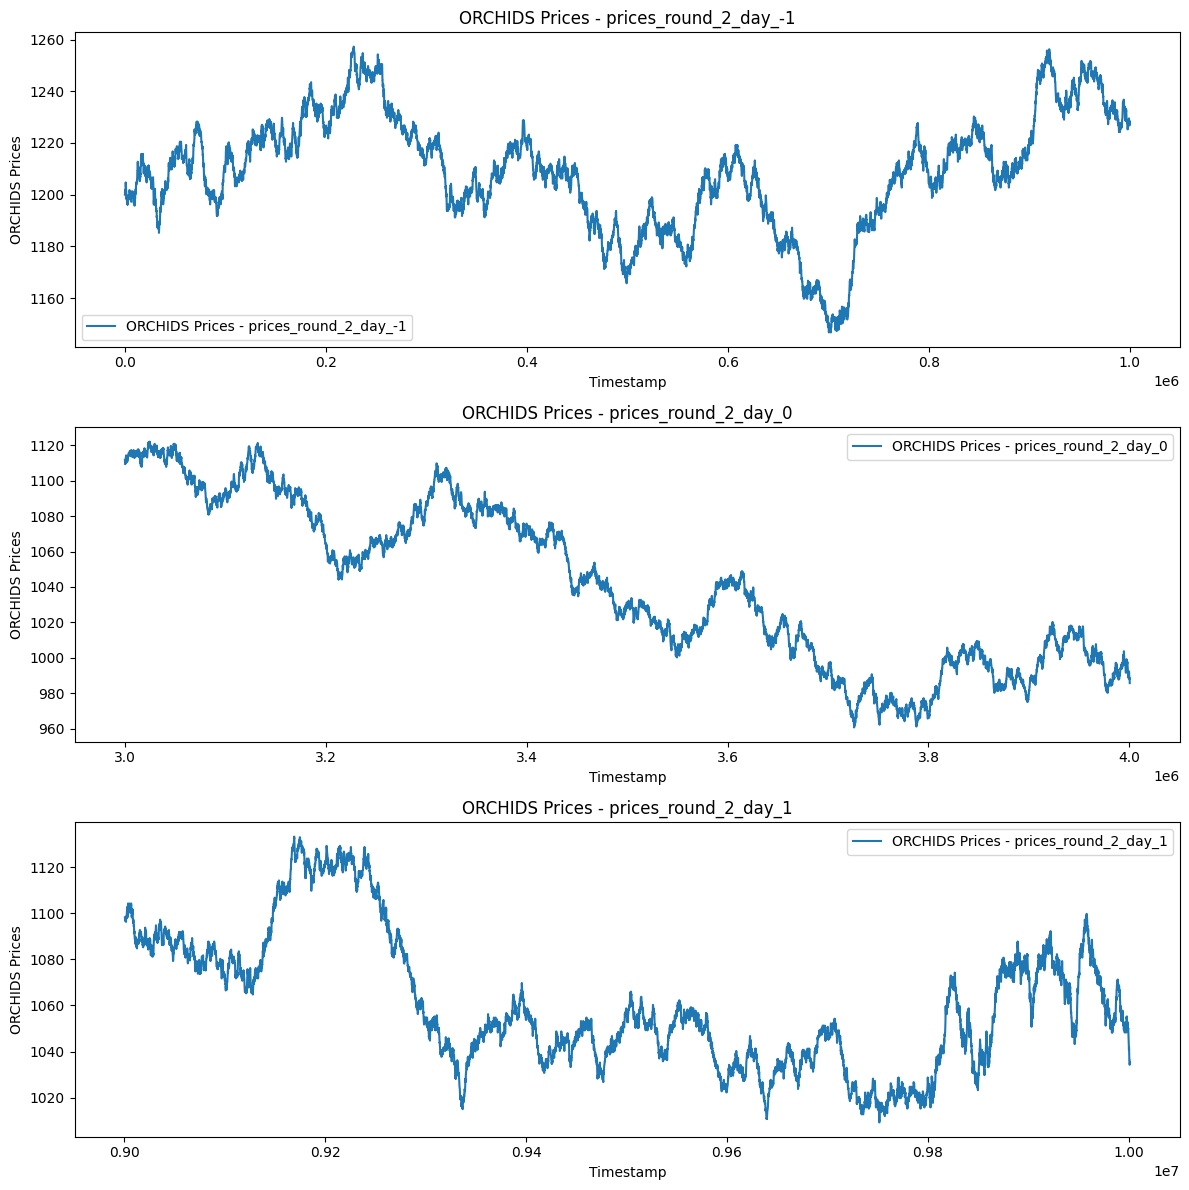

In [25]:

fig, ax = plt.subplots(3, 1, figsize=(12, 12))

for i, (sheet_name, data) in enumerate(sheets_data.items()):
    ax[i].plot(data['timestamp'], data['ORCHIDS'], label=f"ORCHIDS Prices - {sheet_name}")
    ax[i].set_title(f"ORCHIDS Prices - {sheet_name}")
    ax[i].set_xlabel("Timestamp")
    ax[i].set_ylabel("ORCHIDS Prices")
    ax[i].legend()

plt.tight_layout()
plt.show()


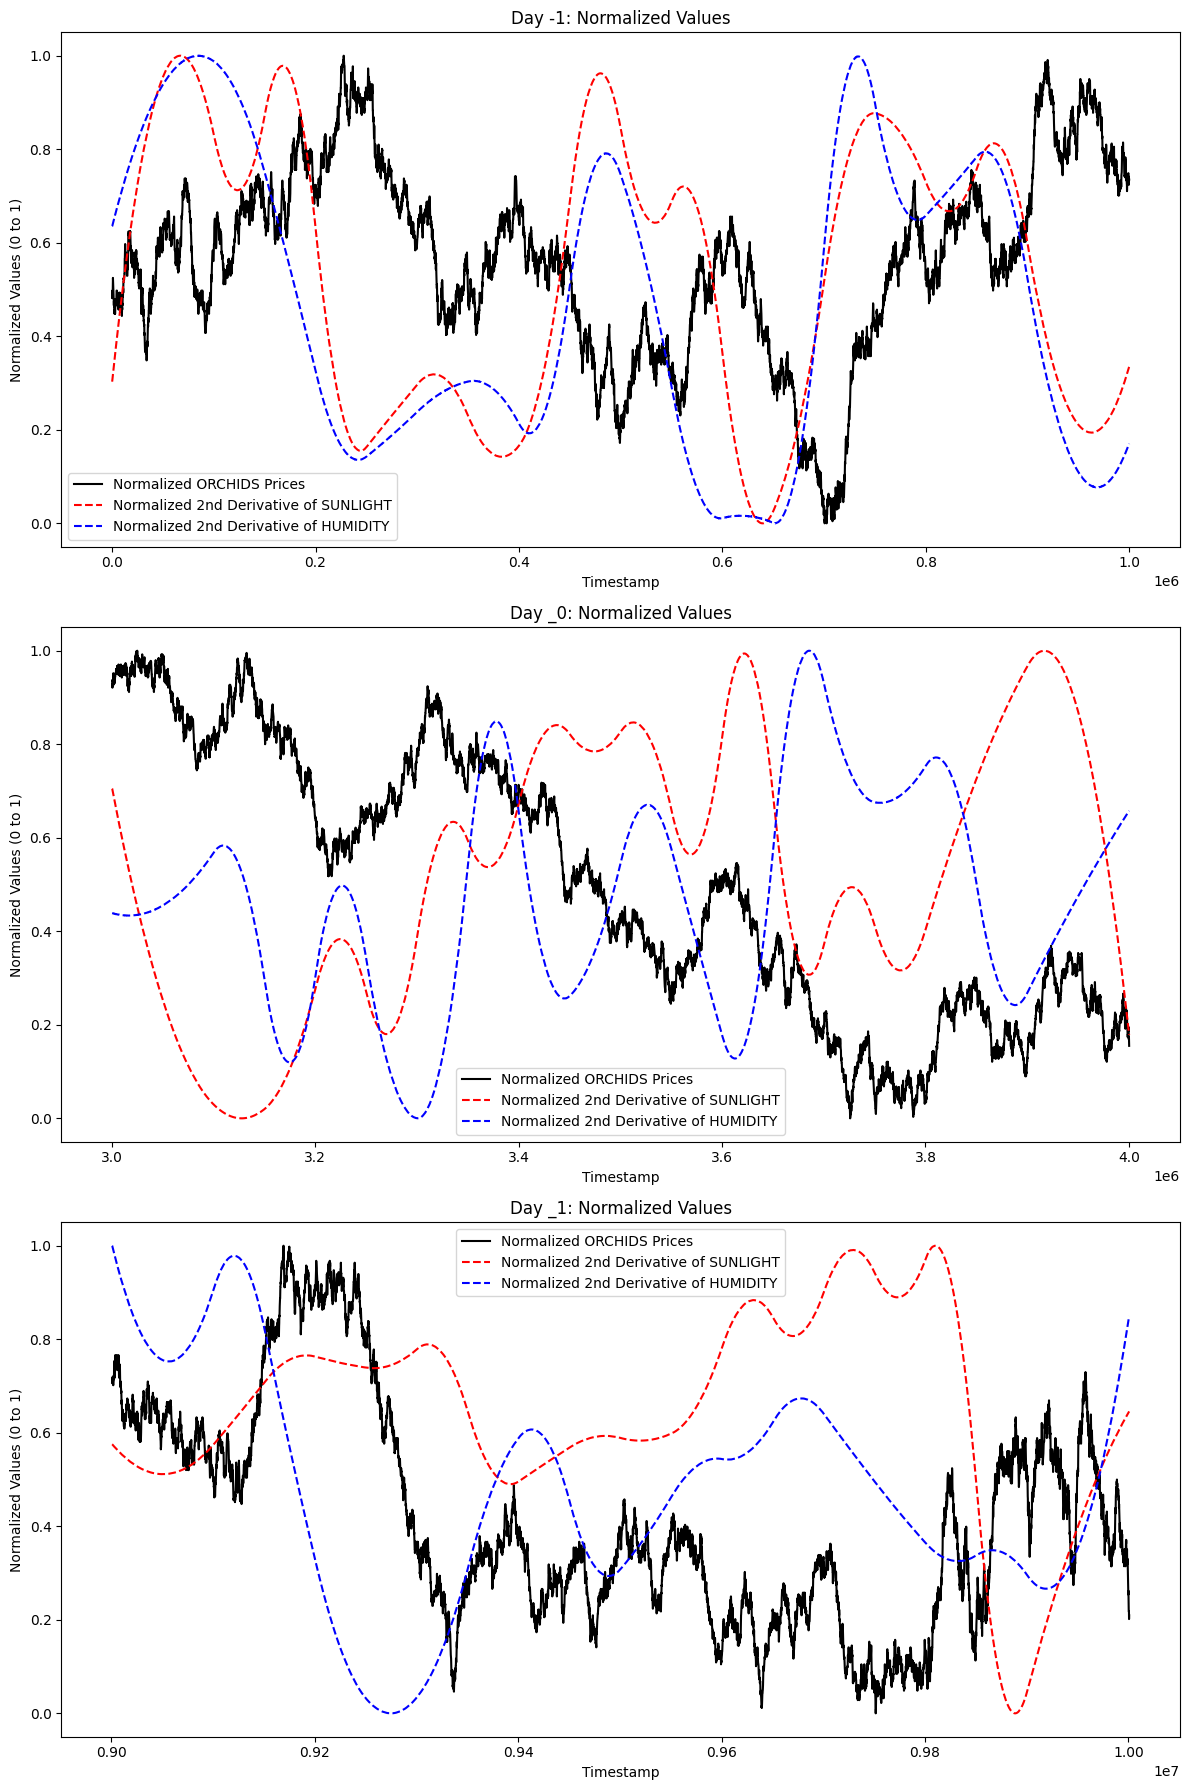

In [30]:
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Plotting each sheet separately with normalized derivatives and orchid prices
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Names of the sheets for easy reference
sheet_names = list(sheets_data.keys())

for i, sheet_name in enumerate(sheet_names):
    # Extract data for the current sheet
    data = sheets_data[sheet_name]
    
    # Calculate normalized second derivatives for sunlight and humidity
    norm_sunlight_derivative = normalize(improved_nth_derivative(data['SUNLIGHT'].to_numpy(), n=1))
    norm_humidity_derivative = normalize(improved_nth_derivative(data['HUMIDITY'].to_numpy(), n=1))
    norm_orchids_prices = normalize(data['ORCHIDS'])
    
    # Plotting
    ax = axes[i]
    ax.plot(data['timestamp'], norm_orchids_prices, 'k-', label='Normalized ORCHIDS Prices')
    ax.plot(data['timestamp'], norm_sunlight_derivative, 'r--', label='Normalized 2nd Derivative of SUNLIGHT')
    ax.plot(data['timestamp'], norm_humidity_derivative, 'b--', label='Normalized 2nd Derivative of HUMIDITY')
    
    ax.set_title(f'Day {sheet_name[-2:]}: Normalized Values')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Normalized Values (0 to 1)')
    ax.legend()

plt.tight_layout()
plt.show()


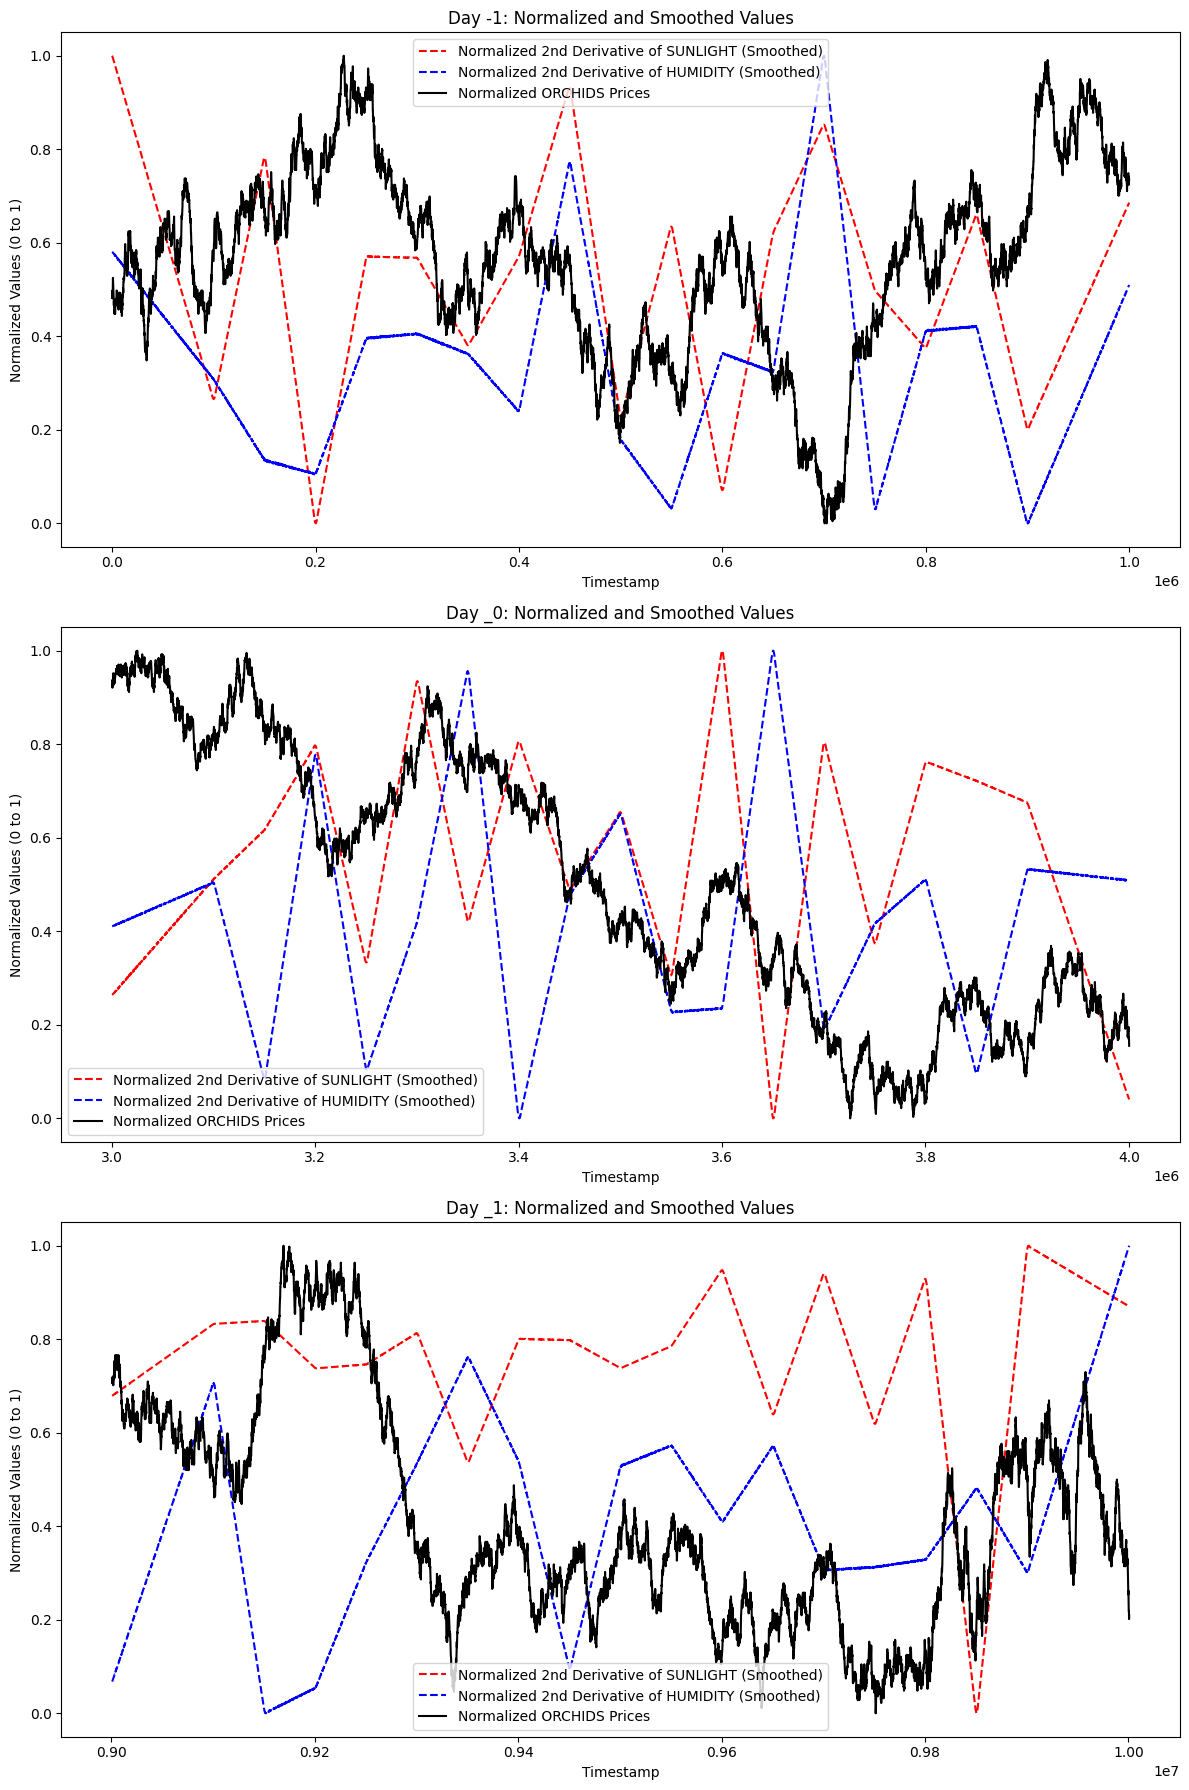

In [37]:
from scipy.signal import savgol_filter

# Function to apply Savitzky-Golay filter and then calculate the n-th derivative using a smoothed array
def smooth_and_derivative(data, window_length=51, polyorder=3, derivative_order=2):
    # Check if the length of the data is greater than the window length
    if len(data) < window_length:
        # Reduce window length if data is too short
        window_length = len(data) // 2
        window_length += 1 if window_length % 2 == 0 else 0  # window length must be odd
    # Apply the Savitzky-Golay filter
    smoothed = savgol_filter(data, window_length, polyorder)
    # Calculate derivative
    derivative = np.gradient(smoothed, edge_order=2)
    if derivative_order > 1:
        for _ in range(1, derivative_order):
            derivative = np.gradient(derivative, edge_order=2)
    return derivative

# Applying filter and calculating derivatives for each sheet
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

for i, sheet_name in enumerate(sheet_names):
    data = sheets_data[sheet_name]
    
    # Applying Savitzky-Golay filter and calculating the second derivative
    sunlight_derivative = smooth_and_derivative(data['SUNLIGHT'], derivative_order=2)
    humidity_derivative = smooth_and_derivative(data['HUMIDITY'], derivative_order=2)
    
    # Normalizing the derivatives
    norm_sunlight_derivative = normalize(sunlight_derivative)
    norm_humidity_derivative = normalize(humidity_derivative)
    norm_orchids_prices = normalize(data['ORCHIDS'])
    
    # Plotting
    ax = axes[i]
    ax.plot(data['timestamp'], norm_sunlight_derivative, 'r--', label='Normalized 2nd Derivative of SUNLIGHT (Smoothed)')
    ax.plot(data['timestamp'], norm_humidity_derivative, 'b--', label='Normalized 2nd Derivative of HUMIDITY (Smoothed)')
    ax.plot(data['timestamp'], norm_orchids_prices, 'k-', label='Normalized ORCHIDS Prices')
    
    ax.set_title(f'Day {sheet_name[-2:]}: Normalized and Smoothed Values')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Normalized Values (0 to 1)')
    ax.legend()

plt.tight_layout()
plt.show()
